In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/speeddating modified.csv')

In [4]:
df_perso = pd.read_csv('data/speeddating personal.csv')

In [5]:
df2 = df.copy()

In [6]:
caractéristiques_fixes = ['race', 'age', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
                          'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
                          'concerts', 'music', 'shopping', 'yoga']

In [7]:
variables_quantitatives = ['age', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
                          'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
                          'concerts', 'music', 'shopping', 'yoga']

In [8]:
variables_qualitatives = ['race']

## (OPTIONNEL) Régression de decision_o sur les notes reçues = ['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitious_o', 'shared_interests_o']

### Dans cette partie, on va voir si un trait physique/de la personnalité a une grande influence dans la décision du partenaire. Les notes reçues correspondent aux notes que le partenaire donne à l'individu.

In [9]:
notes_reçues = ['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambition_o', 'shared_interests_o']

In [10]:
df2[notes_reçues + ['decision_o']].isna().any(axis=1).sum()

1310

### On supprime d'abord les valeurs manquantes 

In [11]:
df3 = df2[notes_reçues + ['decision_o']].dropna()

In [12]:
df3.describe()

,attractive_o,sincere_o,intelligence_o,funny_o,ambition_o,shared_interests_o,decision_o
count,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000
mean,6.181389,7.160168,7.362081,6.393390,6.756849,5.460719,0.429483
std,1.953262,1.748545,1.561906,1.961478,1.797939,2.150130,0.495038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,0.000000
50%,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,0.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,1.000000
max,10.000000,10.000000,10.000000,11.000000,10.000000,10.000000,1.000000


In [13]:
to_scale_n = df3[notes_reçues]
scaler_n=StandardScaler()
scaler_n.fit(to_scale_n)

StandardScaler()

In [14]:
scaled_features_n = scaler_n.transform(to_scale_n) # Reduce and center the quantitative variables
df_scaled_n = pd.DataFrame(scaled_features_n, columns=notes_reçues)
df_scaled_n
final_df_n = pd.concat([df_scaled_n.reset_index(), df3['decision_o'].reset_index()], axis = 1)
del final_df_n['index']
final_df_n

,attractive_o,sincere_o,intelligence_o,funny_o,ambition_o,shared_interests_o,decision_o
0,-0.092871,0.480338,0.408453,0.819140,0.691481,0.250831,0
1,0.419130,0.480338,1.689032,0.309284,0.135249,-0.214290,0
2,1.955134,1.624229,1.689032,1.838854,1.803947,2.111319,1
3,0.419130,0.480338,1.048742,0.819140,1.247714,1.181075,1
4,0.931131,-0.091607,1.048742,-0.200573,1.247714,0.715953,1
...,...,...,...,...,...,...,...
6894,1.955134,-1.235498,-2.792996,-2.239999,-0.420984,-0.214290,1
6895,-0.092871,-2.379389,-0.231837,-1.730142,0.135249,-1.609656,0
6896,-2.140876,-3.523280,-3.433286,-2.239999,-2.645915,-2.074778,0
6897,-0.604872,-0.091607,-1.512417,-0.710429,-2.089682,0.250831,1


In [15]:
x_n=final_df_n[notes_reçues]
y_n=final_df_n['decision_o']
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_n, y_n, random_state = 0)

In [16]:
#instanciation du modèle
modele_regLog_n = LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog_n.fit(x_train_n,y_train_n)
#précision du modèle
precision_n = modele_regLog_n.score(x_test_n,y_test_n)
print('précision de la régression logistique:', precision_n*100)

précision de la régression logistique: 74.72463768115942


### On peut souligner une précision de notre régression logistique meilleure qu'auparavant ! 🥳🥳🥳

In [17]:
results_df_n = pd.DataFrame(np.concatenate([modele_regLog_n.intercept_.reshape(-1,1),
                             modele_regLog_n.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x_n.columns)).T
sorted_df_n = results_df_n.sort_values('coef').transpose()

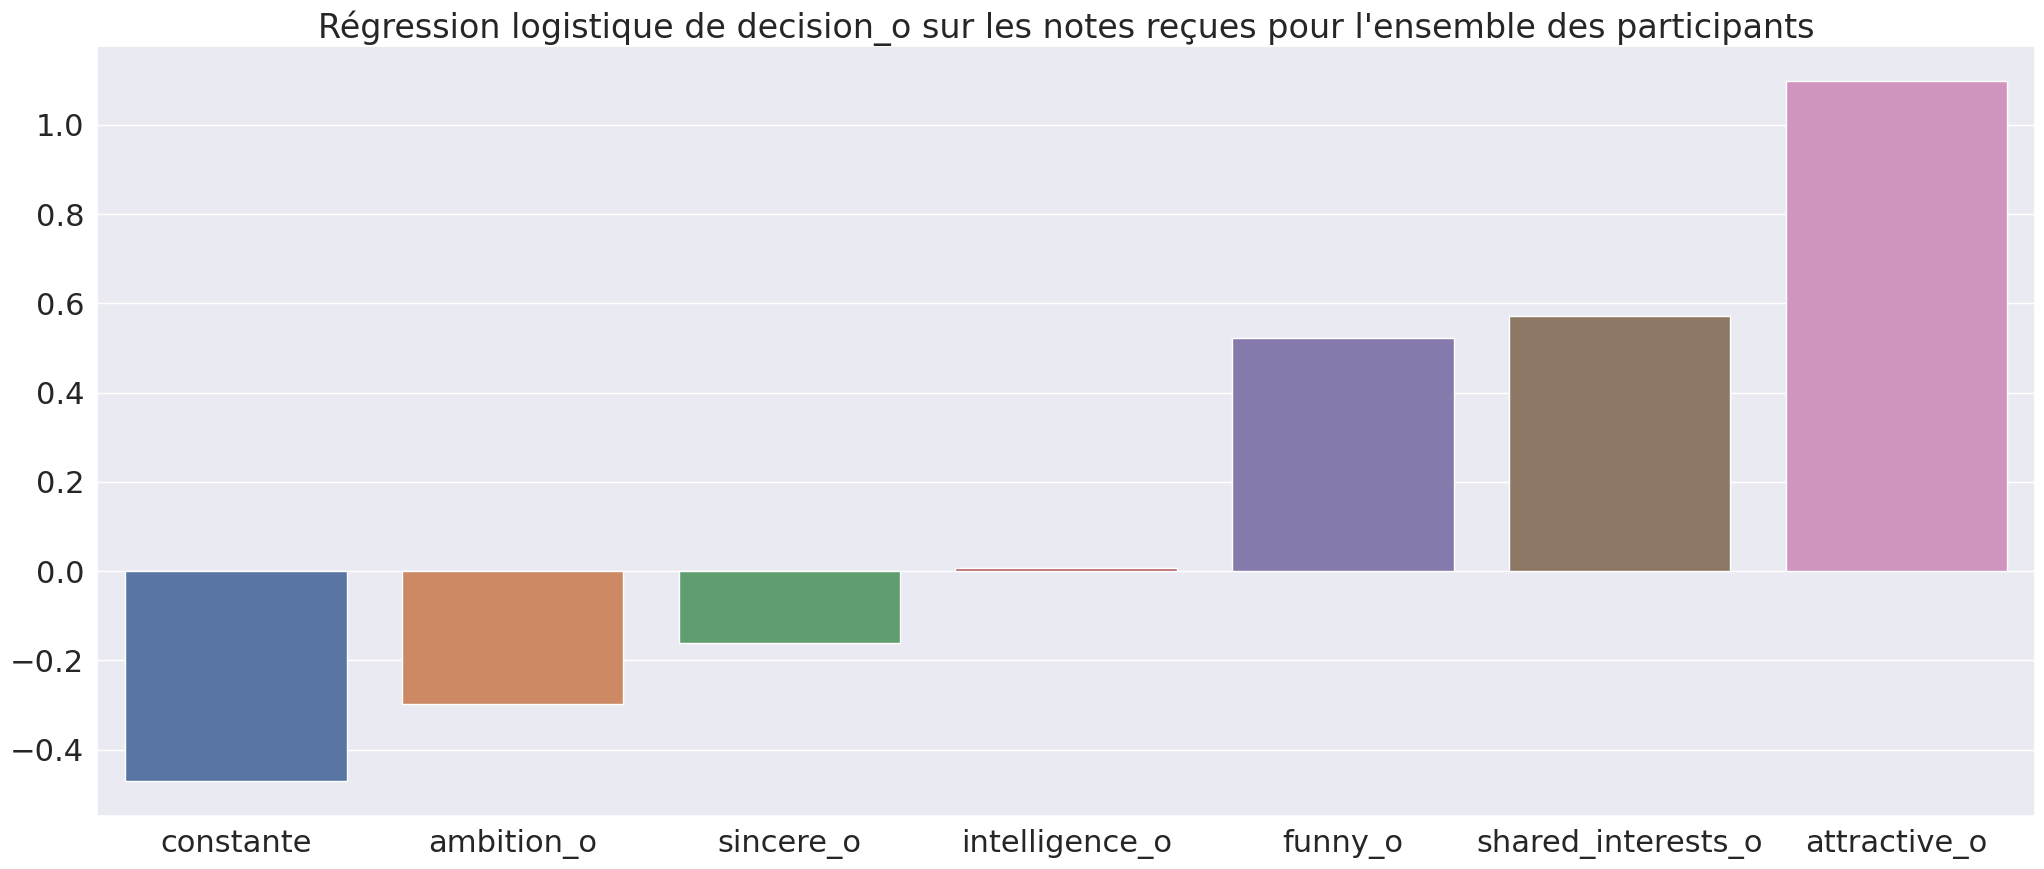

In [18]:
sns.set(rc={'figure.figsize':(25,10)}) # Augmenter la taille du graphique
sns.set(font_scale=2)
sns.barplot(sorted_df_n).set(title="Régression logistique de decision_o sur les notes reçues pour l'ensemble des participants")
plt.show()

#### Sans surprise, sur les caractéristiques plus générales, si le partenaire trouve l'individu attirant(e), il/elle va vouloir le/la revoir. Même raisonnement pour centres d'intérêts partagés. Bizarre au niveau de ambition_o et sincere_o (coeff négatif)? A réfléchir